<a href="https://colab.research.google.com/github/sattviksahai/CS583B_Recitation/blob/master/IMDB_reviews_reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Extract data

In [2]:
!tar -xf 'drive/My Drive/aclImdb_v1.tar.gz'
! rm -rf aclImdb/train/unsup/
!ls

aclImdb  drive	sample_data


Read Training Data

In [0]:
import os
imdb_dir = './aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels_train = []
texts_train = []
for label_type in ['pos', 'neg']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts_train.append(f.read())
      f.close()
      if label_type == 'neg':
        labels_train.append(0)
      else:
        labels_train.append(1)

In [4]:
print('Number of training samples: '+str(len(texts_train)))
print('Number of training labels: '+str(len(labels_train)))

Number of training samples: 25000
Number of training labels: 25000


Display random review with label

In [5]:
import numpy as np

i=np.random.randint(len(labels_train))
print('label #'+str(i)+': '+str(labels_train[i]))
print('text #'+str(i)+':')
print(texts_train[i])

label #13649: 0
text #13649:
A retired diplomat, played nicely by Michael York, goes to Russia to get revenge on the Russian gangster that murdered the diplomat's policeman son. There the diplomat meets an exceptionally strong and decent Russian cop who helps him bring the Russian gangster to justice.<br /><br />I remembered the old action flicks of the 1980s that always portray the Russians as evil bad guys out to undermine the righteous U.S. government. It's interesting to see this time the Russian guy as a hero.<br /><br />Not a great flick, it's really typically a "B" action flick. Michael York lends some class to this mediocre movie. Alexander Nevsky, who plays the Russian cop is kind of "blah" but surprisingly has some chemistry with Michael York. Face it, Michael York is such a good actor that he'd have chemistry with anyone he's doing a scene with. Disappointingly, the handsome Adrian Paul gets killed within the first 15 minutes into the movie. Now, if Adrian Paul was in this m

Tokenize the text

In [6]:
from keras.preprocessing.text import Tokenizer

vocabulary = 10000
tokenizer = Tokenizer(num_words=vocabulary)
tokenizer.fit_on_texts(texts_train)

word_index = tokenizer.word_index
sequences_train = tokenizer.texts_to_sequences(texts_train)

Using TensorFlow backend.


Add Padding

In [0]:
from keras import preprocessing

word_num = 20
x_train_val = preprocessing.sequence.pad_sequences(sequences_train, maxlen=word_num)

In [8]:
print(x_train_val.shape)

(25000, 20)


Training Validation split

In [9]:
split_ratio = 0.8

indices = np.arange(x_train_val.shape[0])
np.random.shuffle(indices)

x_train = x_train_val[indices[:int(len(indices)*split_ratio)]]
x_val = x_train_val[indices[int(len(indices)*split_ratio):]]

labels_train = np.array(labels_train)
y_train = labels_train[indices[:int(len(indices)*split_ratio)]]
y_val = labels_train[indices[int(len(indices)*split_ratio):]]
print('Shape of training data: ', x_train.shape)
print('Shape of training labels: ', y_train.shape)
print('Shape of validation data: ', x_val.shape)
print('Shape of validation labels: ', y_val.shape)

Shape of training data:  (20000, 20)
Shape of training labels:  (20000,)
Shape of validation data:  (5000, 20)
Shape of validation labels:  (5000,)


Define Model

In [10]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

embedding_dim = 8

model = Sequential()
model.add(Embedding(vocabulary, embedding_dim, input_length=word_num))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


Define Optimizer

In [11]:
from keras import optimizers

epochs = 50

model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
            loss='binary_crossentropy', metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train

In [12]:
history = model.fit(x_train, y_train, epochs=epochs,
                    batch_size=32, validation_data=(x_val, y_val))




Train on 20000 samples, validate on 5000 samples
Epoch 1/50





20000/20000 [==============================] - 10s 512us/step - loss: 0.6930 - acc: 0.5081 - val_loss: 0.6921 - val_acc: 0.5188
Epoch 2/50
20000/20000 [==============================] - 2s 100us/step - loss: 0.6908 - acc: 0.5489 - val_loss: 0.6907 - val_acc: 0.5454
Epoch 3/50
20000/20000 [==============================] - 2s 99us/step - loss: 0.6879 - acc: 0.5903 - val_loss: 0.6885 - val_acc: 0.5718
Epoch 4/50
20000/20000 [==============================] - 2s 99us/step - loss: 0.6838 - acc: 0.6314 - val_loss: 0.6848 - val_acc: 0.6034
Epoch 5/50
20000/20000 [==============================] - 2s 98us/step - loss: 0.6777 - acc: 0.6704 - val_loss: 0.6791 - val_acc: 0.6340
Epoch 6/50
20000/20000 [==============================] - 2s 101us/step - loss: 0.6691 - acc: 0.7008 - val_loss: 0.6708 - val_acc: 0.6618
Epoch 7/50
20000/20000 [==============================] - 2s 97us/step - loss: 0.6576 - acc: 0.7202 - val_loss: 0.659

Visualize training

[0.5081, 0.54885, 0.5903, 0.63145, 0.67045, 0.70085, 0.7202, 0.7316, 0.7382, 0.7441, 0.74755, 0.7521, 0.75875, 0.7632, 0.76795, 0.772, 0.77765, 0.7807, 0.78395, 0.7867, 0.79, 0.7939, 0.79565, 0.79865, 0.80165, 0.80445, 0.80785, 0.81075, 0.8133, 0.8155, 0.818, 0.82065, 0.8221, 0.8244, 0.82625, 0.82785, 0.8294, 0.8311, 0.83255, 0.83405, 0.8351, 0.8366, 0.8373, 0.8394, 0.8406, 0.84195, 0.8438, 0.84455, 0.8469, 0.84735]


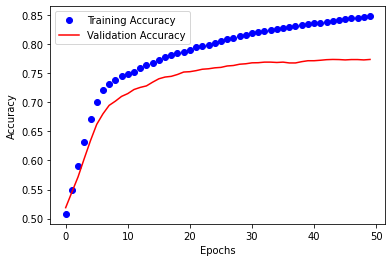

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(epochs) # 50 is the number of epochs
train_acc = history.history['acc']
valid_acc = history.history['val_acc']
print(train_acc)
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, valid_acc, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
model.save('dense_imdb_model.h5')